<a href="https://colab.research.google.com/github/Pranjal-777/Student_Performance/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import files                    # Upload your file in Colab
uploaded = files.upload()

data = pd.read_csv("StudentPerformanceFactors.csv")      # Load the CSV file





Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (3).csv


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Question 1: How does the number of hours studied per week correlate with the final exam score?

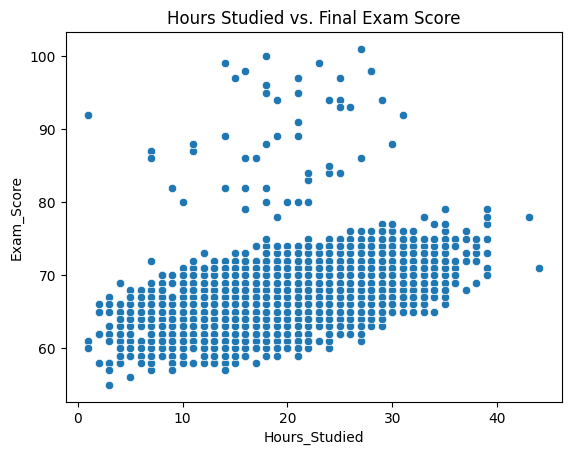

Correlation Coefficient: 0.44545495407528235


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot and correlation
sns.scatterplot(x=data['Hours_Studied'], y=data['Exam_Score'])
plt.title('Hours Studied vs. Final Exam Score')
plt.show()

# Correlation coefficient
correlation = data['Hours_Studied'].corr(data['Exam_Score'])
print("Correlation Coefficient:", correlation)


Question 2: Is there a significant relationship between class attendance percentage and exam scores?

In [ ]:
from scipy.stats import pearsonr

# Correlation test
corr, p_value = pearsonr(data['Attendance'], data['Exam_Score'])
print("Correlation:", corr, "P-value:", p_value)


Correlation: 0.5810718633120641 P-value: 0.0


Question 3: Does the average number of sleep hours per night influence exam performance?

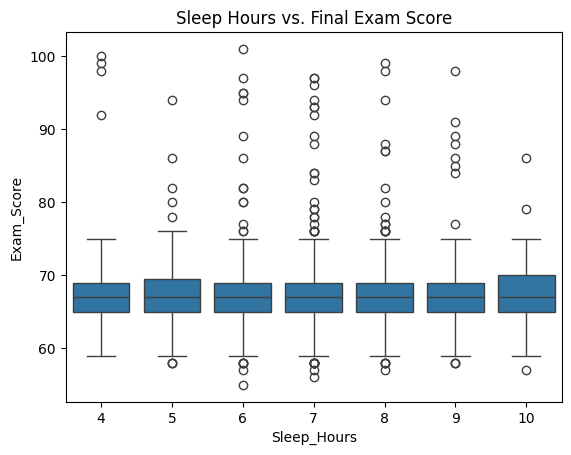

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.914
Date:                Wed, 15 Jan 2025   Prob (F-statistic):              0.167
Time:                        10:05:53   Log-Likelihood:                -18349.
No. Observations:                6607   AIC:                         3.670e+04
Df Residuals:                    6605   BIC:                         3.672e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          67.5527      0.234    288.559      

In [ ]:
sns.boxplot(x=data['Sleep_Hours'], y=data['Exam_Score'])
plt.title('Sleep Hours vs. Final Exam Score')
plt.show()

# Regression analysis
import statsmodels.api as sm
X = data['Sleep_Hours']
y = data['Exam_Score']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


In [ ]:
sns.heatmap(data[['Family_Income', 'Parental_Education_Level', 'Exam_Score']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Low'

Question 5: Do private school students perform better in exams than public school students?

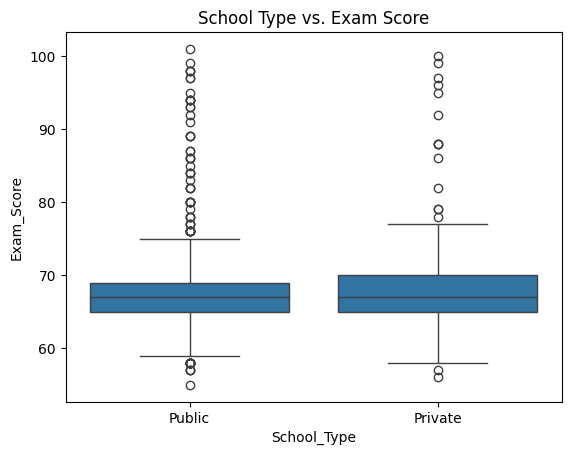

T-statistic: 0.7187537041931684 P-value: 0.47231811262174417


In [ ]:
sns.boxplot(x=data['School_Type'], y=data['Exam_Score'])
plt.title('School Type vs. Exam Score')
plt.show()

# Statistical test
from scipy.stats import ttest_ind
private_scores = data[data['School_Type'] == 'Private']['Exam_Score']
public_scores = data[data['School_Type'] == 'Public']['Exam_Score']
t_stat, p_value = ttest_ind(private_scores, public_scores)
print("T-statistic:", t_stat, "P-value:", p_value)
